## 베이즈 추정법이란
- 베이즈 추정법(Bayesian estimation)은 모숫값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업

- 최대가능도 추정법에서는 어떤 확률 분포함수의 모수$μ$를 미지의 상수로 봄
- **베이즈 추정법에서는 모수를 확률변수(확률 밀도 함수)로 본다.**
- **즉, 어떤 값이 가능성이 높고 어떤 값이 가능성이 낮은지를 펴보겠다는 뜻**

## 베이즈 추정법 사용 이유
- 베이즈 추정법을 사용하는 이유는 추정된 모숫값 숫자 하나만으로는 추정의 신뢰도와 신뢰구간을 구할 수 없기 때문

- 예제
    - 상황 : 인터넷 쇼핑몰 두 개의 경쟁상품에 사용자 의견이 존재
        - 상품 A: 전체 평가의견 3개, 좋아요 2개, 싫어요 1개
        - 상품 B: 전체 평가의견 100개, 좋아요 60개, 싫어요 40개
    - 추정 : 상품(A or B) 사용시 평가의견이 ‘좋아요’가 나올지‘싫어요’가 나올지
    - 베르누이분포 확률변수로 모형화 가능
    - 최대가능도 추정법 적용시 
        - 상품 A의 모수: 2/3 = 0.67
        - 상품 B의 모수: 60/100 = 0.60

    - **결과 : 상품 B의 평가 의견은 100개고, 상품 A의 평가의견은 3개밖에 되지 않는데 상품 A의 모수가 더 높다고 더 높은 상품이라고 확신할 수 없다**
    - **베이즈 추정법에서는 단순히 모수의 값을 하나의 숫자로 구하는 것이 아니므로 분포를 통해 잘못된 결론을 내리지 않도록 도와줌.**

<hr>

## 베이즈 추정법의 기본 원리 
- 수학적으로 베이즈 추정법은 주어진 데이터 ${x_1,…,x_N}$를 기반으로 모수 $μ$ 의 조건부 확률분포 $p(μ|x_1,…,x_N)$를 계산하는 작업
- 조건부 확률분포를 구하므로 베이즈 정리를 사용

![bayesian](img/bayesian.PNG)

- $P(μ)$ 는 모수의 사전(Prior) 분포.
    - 사전 분포는 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 
    
- $p(μ∣x1,…,xN)$는 모수의 사후(Posterior)분포
    - 수학적으로는 데이터 $x_1,…,x_N$가 주어진 상태에서의 $μ$에 대한 조건부 확률 분포
    - 베이즈 추정법을 통해 구하고자 하는 것이 바로 이 사후 분포다.

- **$p(x_1,…,x_N ∣ μ)$는 가능도(likelihood)분포**다. 모수 
    - $μ$가 특정한 값으로 주어졌을 때 주어진 데이터 ${x_1,…,x_N}$가 나올 수 있는 확률값을 나타낸다.

## 베이즈 추정법 모수 분포의 표현방법
- 모수적(parametric) 방법
    - 다른 확률 분포를 사용하여 추정된 모수의 분포를 나타냄
    - 모수 분포를 표현하는 확률분포함수의 모수를 하이퍼 모수(hyper parameter) 라고 부름
    - **모수적 방법을 사용한 베이즈 추정법은 결국 하이퍼 모숫값을 계산하는 작업**
    
- **비모수적(non-parametric) 방법**
    - 모수의 분포와 동일한 분포를 가지는 실제 표본 집합을 생성하여 히스토그램이나 최빈값 등으로 분포를 표현
    - MCMC(Markkov chain Monte Carlo)와 같은 몬테카를로 (Monte Carlo) 방법이 비모수적 방법
    
    
    

## 예제
- 동전을 10번 던져서 앞면이 6번 나왔다. 
    - 이 때 사전분포가 하이퍼모수 a=b=1인 베타분포라면
    - 사후분포는 다음과 같은 하이퍼모수를 가지는 베타분포가 된다.
        - $a' = 6+1 = 7$
        - $b1 = 4+1 = 5$
    - 최대가능도 추정법으로 구한 베르누이 모수의 값은 0.6이다.

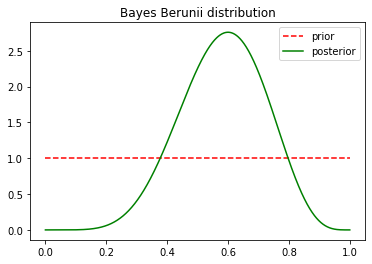

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1

# 사전분포
plt.plot(xx, stats.beta(a0, b0).pdf(xx), c="r", ls="--", label="prior")
a1, b1 = 6 + 1, 4 + 1

# 사후분포
plt.plot(xx, stats.beta(a1, b1).pdf(xx), c="g", ls="-", label="posterior")
plt.legend()
plt.title("Bayes Berunii distribution") # 베이즈 추정법으로 계산한 베르누이분포 모수의 분포
plt.show()


## 베이즈 추정법의 장점
- 베이즈 추정법의 장점은 순차적(sequential) 계산이 가능하다는 점
- **매 50개의 데이터를 수집하는 경우, 베이즈 추정법을 사용시 첫날 50개의 데이터로 모수를 추정한 뒤, 다음날에는 추가적인 데이터 50개를 사용하여 모숫값을 더 정확하게 수정가능**

- 최대가능도 추정법을 사용시 데이터가 더 수집되면 점점 추정에 사용되는 데이터의 수가 증가하고 그에 따라 계산량도 증가

## 예제2
- 상품 A와 상품 B의 베르누이 모수의 사후분포의 하이퍼파라미터를 구하고 
- 각각 사후분포 확률밀도함수를 그려라

초기 추정: 모드 = 모름
0 estimation: mode = 0.64
1 estimation: mode = 0.69
2 estimation: mode = 0.65


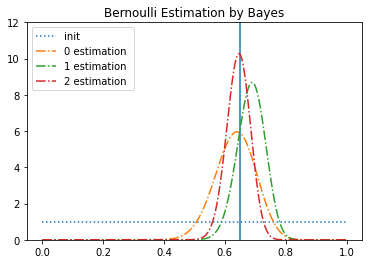

In [8]:
mu0 = 0.65
a, b = 1, 1
print("초기 추정: 모드 = 모름")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, stats.beta(a, b).pdf(xx), ls=":", label="init")

np.random.seed(0)

for i in range(3):
    x = stats.bernoulli(mu0).rvs(50) # random variables 50개
    N0, N1 = np.bincount(x, minlength=2)
    a, b = a + N1, b + N0
    plt.plot(xx, stats.beta(a, b).pdf(xx), ls="-.", label="{} estimation ".format(i))
    print("{} estimation: mode = {:4.2f}".format(i, (a - 1)/(a + b - 2)))


plt.vlines(x=0.65, ymin=0, ymax=12)
plt.ylim(0, 12)
plt.legend()
plt.title("Bernoulli Estimation by Bayes") # 베르누이분포의 모수를 베이즈 추정법으로 추정한 결과
plt.show()

## 예제 3
- 실제 기댓값이 2, 분산이 4인 정규분포에서 나온 데이터를 이용
- 기댓값 모수를 순차적 베이즈 추정한 결과
- 각 차수별로 100개의 데이터를 사용하였다. 초기 추정값 즉, 사전확률분포로는 기댓값이 0, 분산이 1인 정규분포를 사용

0 estimation: 1.98
1 estimation: 2.07
2 estimation: 2.05
3 estimation: 2.03


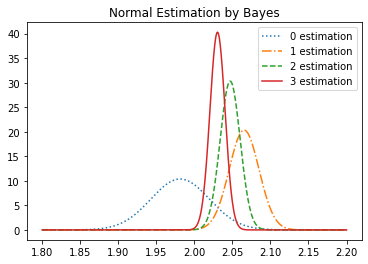

In [9]:

# init
mu0, sigma20 = 0, 1

# 추가 데이터
mu, sigma2 = 2, 4
xx = np.linspace(1.8, 2.2, 1000)

np.random.seed(1)
N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = stats.norm(mu).rvs(N)
    mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
        (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
    sigma20 = 1/(1/sigma20 + N/sigma2)
    
    # 개선된 정규분포
    plt.plot(xx, stats.norm(mu0, sigma20).pdf(xx), ls=ls[i], label="{} estimation".format(i))
    print("{} estimation: {:4.2f}".format(i, mu0))
    
plt.legend()
plt.title("Normal Estimation by Bayes") # 정규분포의 기댓값을 베이즈 추정법으로 추정한 결과
plt.show()

## 참고문헌
https://datascienceschool.net/02%20mathematics/09.03%20%EB%B2%A0%EC%9D%B4%EC%A6%88%20%EC%B6%94%EC%A0%95%EB%B2%95.html